<a href="https://colab.research.google.com/github/Sudipta-Mitra/Task3-linear-regression-/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-price-prediction


In [ ]:
import os

downloaded_path = '/kaggle/input/housing-price-prediction'
print(os.listdir(downloaded_path))

['Housing.csv']


In [ ]:
import pandas as pd
file_path = '/kaggle/input/housing-price-prediction/Housing.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(436, 12)

In [ ]:
X_test.shape

(109, 12)

In [ ]:
X_train_simple = X_train[['area']]
X_test_simple = X_test[['area']]

In [ ]:
from sklearn.linear_model import LinearRegression

model_simple = LinearRegression()

In [ ]:
model_simple.fit(X_train_simple, y_train)

LinearRegression()

In [ ]:
y_pred_simple = model_simple.predict(X_test_simple)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred_simple)
mse = mean_squared_error(y_test, y_pred_simple)
r2 = r2_score(y_test, y_pred_simple)

In [ ]:
mae

1474748.1337969352

In [ ]:
mse

3675286604768.185

In [ ]:
r2

0.27287851871974644

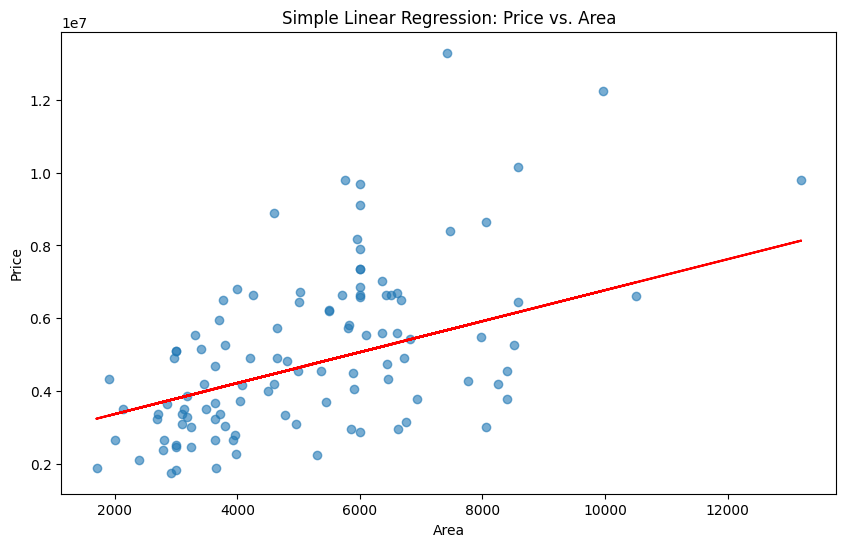

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, label='Actual Prices', alpha=0.6)
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs. Area')
plt.show()

In [ ]:
multiple_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train_multiple = X_train[multiple_features]
X_test_multiple = X_test[multiple_features]

In [ ]:
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train)

LinearRegression()

In [ ]:
y_pred_multiple = model_multiple.predict(X_test_multiple)

In [ ]:
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

In [ ]:
mae_multiple

1127483.3523235188

In [ ]:
mse_multiple

2292721545725.3613

In [ ]:
r2_multiple

0.5464062355495873

In [ ]:
print("Coefficients:", model_multiple.coef_)

Coefficients: [3.08866956e+02 1.51246751e+05 1.18573171e+06 4.95100763e+05
 3.37660830e+05]


In [ ]:
print("Intercept:", model_multiple.intercept_)

Intercept: 51999.67680883687
